In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot') 


In [118]:
columns= ['user_id','order_dt','order_products','order_amount']
df = pd.read_table(r'D:\CodeProjects\practice\cdnew.txt',names= columns,sep='\s+',header = None)

In [119]:
df.head()


,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [120]:
df.describe()


,user_id,order_dt,order_products,order_amount
count,56.000000,5.600000e+01,56.000000,56.000000
mean,8.160714,1.997152e+07,2.642857,35.291607
std,4.838395,3.111691e+03,1.985663,29.599975
min,1.000000,1.997010e+07,1.000000,2.990000
25%,5.000000,1.997010e+07,1.000000,14.960000
50%,7.500000,1.997041e+07,2.000000,28.625000
75%,11.000000,1.997104e+07,3.000000,40.847500
max,19.000000,1.998061e+07,10.000000,163.350000


In [121]:
df['order_date'] = pd.to_datetime(df.order_dt,format="%Y%m%d")


In [122]:
df['month'] = df.order_date.values.astype('datetime64[M]')

In [123]:
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [124]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,56.000000,5.600000e+01,56.000000,56.000000
mean,8.160714,1.997152e+07,2.642857,35.291607
std,4.838395,3.111691e+03,1.985663,29.599975
min,1.000000,1.997010e+07,1.000000,2.990000
25%,5.000000,1.997010e+07,1.000000,14.960000
50%,7.500000,1.997041e+07,2.000000,28.625000
75%,11.000000,1.997104e+07,3.000000,40.847500
max,19.000000,1.998061e+07,10.000000,163.350000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         56 non-null     int64         
 1   order_dt        56 non-null     int64         
 2   order_products  56 non-null     int64         
 3   order_amount    56 non-null     float64       
 4   order_date      56 non-null     datetime64[ns]
 5   month           56 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 2.8 KB


In [126]:
user_grouped = df.groupby('user_id').sum()
user_grouped.head()

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [127]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,1.900000e+01,19.000000,19.000000
mean,5.886343e+07,7.789474,104.017368
std,5.548918e+07,7.465319,95.562818
min,1.997010e+07,1.000000,11.770000
25%,1.997010e+07,3.500000,46.090000
50%,3.994022e+07,5.000000,73.220000
75%,7.988234e+07,9.500000,128.480000
max,2.196861e+08,29.000000,385.610000


<AxesSubplot:xlabel='month'>

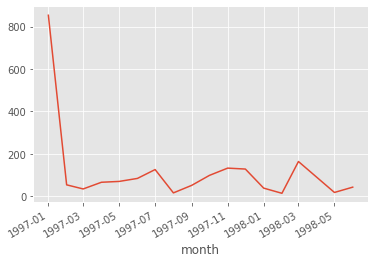

In [128]:
df.groupby('month').order_amount.sum().plot()

<AxesSubplot:xlabel='order_amount', ylabel='order_products'>

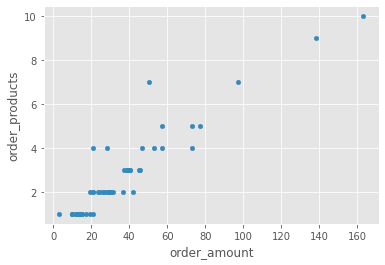

In [129]:
df.plot.scatter(x = 'order_amount',y = 'order_products')

<AxesSubplot:xlabel='order_amount', ylabel='order_products'>

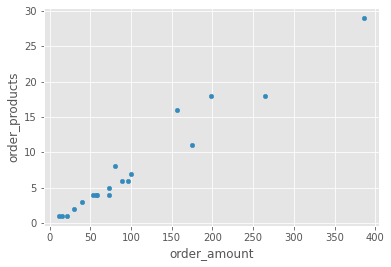

In [130]:
df.groupby('user_id').sum().plot.scatter(x = 'order_amount',y = 'order_products')

<AxesSubplot:>

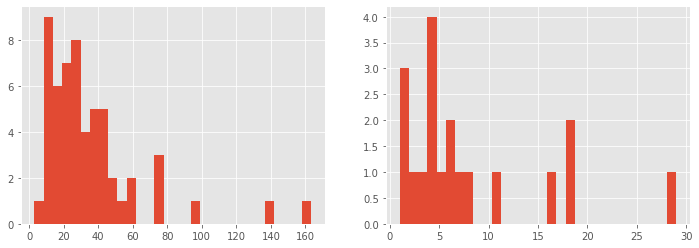

In [131]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df.order_amount.hist(bins = 30)

plt.subplot(122)
df.groupby('user_id').order_products.sum().hist(bins = 30)

In [132]:
df.groupby('user_id').month.min().value_counts()

1997-01-01    19
Name: month, dtype: int64

In [133]:
df.groupby('user_id').month.max().value_counts()

1997-01-01    10
1998-03-01     2
1998-02-01     1
1997-06-01     1
1997-12-01     1
1998-01-01     1
1997-09-01     1
1998-05-01     1
1998-06-01     1
Name: month, dtype: int64

In [134]:
pivoted_counts = df.pivot_table(index = 'user_id', columns = 'month',                                   values = 'order_dt' , aggfunc =                                       'count').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [135]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,1,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

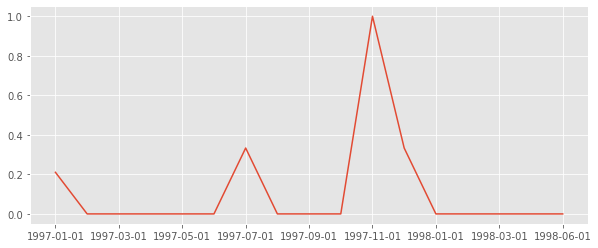

In [136]:
(pivoted_counts_transf.sum() / pivoted_counts_transf.count()).plot(figsize = (10,4))

In [137]:
pivoted_amount = df.pivot_table(index = 'user_id',columns = 'month',values ='order_amount',aggfunc = 'mean').fillna(0)

columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month

In [138]:
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.00,0.0


In [139]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0


In [140]:
def purchase_return(data):
    status = []
    for i in range(16):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series (status,index = columns_month)

pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis = 1)
pivoted_purchase_return.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

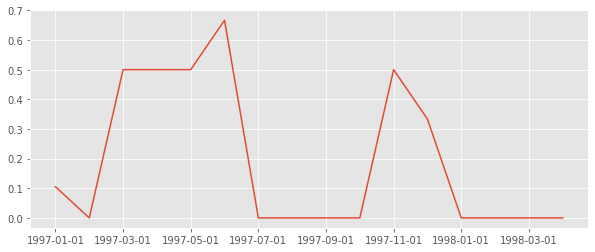

In [141]:
(pivoted_purchase_return.sum() / pivoted_purchase_return.count()).plot(figsize = (10,4))

In [142]:
def active_status(data):
    status = []
    for i in range(17):

        #if there is no consumption this month
        if data[i] == 0:
            if len(status) >0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #if there is consumption this month
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
       
    return status

pivoted_purchase_status = pivoted_purchase.apply(lambda x: pd.Series(active_status(x),index = columns_month),axis = 1)

pivoted_purchase_status.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive


In [143]:
purchase_status_counts = pivoted_purchase_status.replace('enreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-05-01,1998-06-01
active,NaN,2.0,NaN,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
new,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,1.0,1.0
unactive,NaN,17.0,17.0,17.0,17.0,16.0,16.0,18.0,17.0,18.0,17.0,16.0,18.0,18.0,17.0,18.0,18.0


<AxesSubplot:>

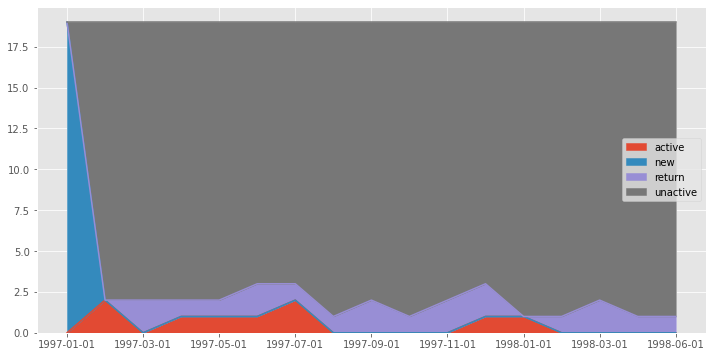

In [144]:
purchase_status_counts.fillna(0).T.plot.area(figsize= (12,6))

<AxesSubplot:>

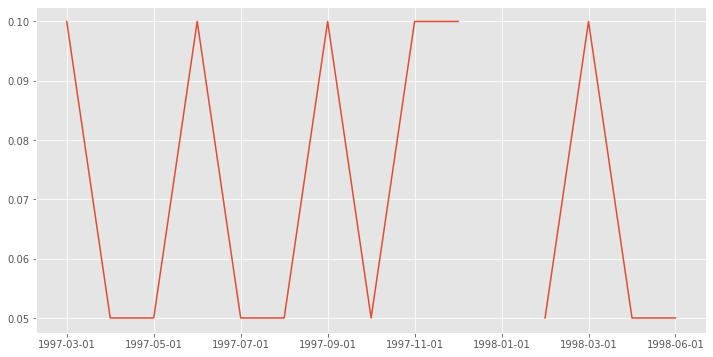

In [145]:
return_rata = purchase_status_counts.apply(lambda x:x /x.sum(),axis =1)
return_rata.loc['return'].plot(figsize = (12,6))

<AxesSubplot:>

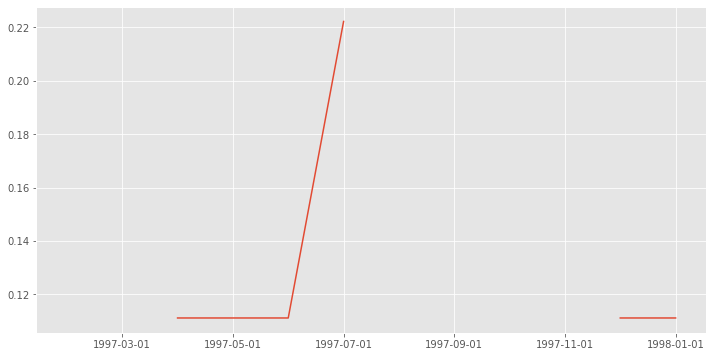

In [146]:
return_rata.loc['active'].plot(figsize = (12,6))

In [147]:
user_amount = df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum'] = user_amount.order_amount.cumsum()
user_amount.tail()

,user_id,order_amount,amount_cumsum
14,3,156.46,953.27
15,19,175.12,1128.39
16,8,197.66,1326.05
17,7,264.67,1590.72
18,5,385.61,1976.33


In [148]:
amount_total = user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.apply(lambda x:x.amount_cumsum / amount_total,axis =1)
user_amount.tail()

,user_id,order_amount,amount_cumsum,prop
14,3,156.46,953.27,0.482344
15,19,175.12,1128.39,0.570952
16,8,197.66,1326.05,0.670966
17,7,264.67,1590.72,0.804886
18,5,385.61,1976.33,1.000000


<AxesSubplot:>

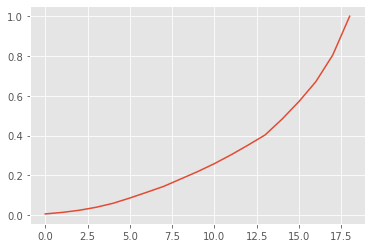

In [149]:
user_amount.prop.plot()

<AxesSubplot:>

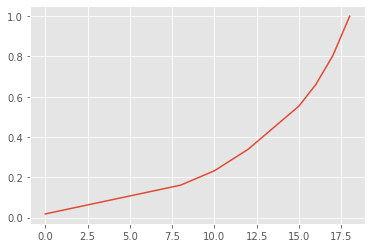

In [150]:
user_counts = df.groupby('user_id').order_dt.count().sort_values().reset_index()
user_counts['counts_cumsum'] = user_counts.order_dt.cumsum()
counts_total = user_counts.counts_cumsum.max()
user_counts['prop'] = user_counts.apply(lambda x:x.counts_cumsum / counts_total,axis = 1)
user_counts.prop.plot()

In [151]:
user_purchase = df[['user_id','order_products','order_amount','order_date']]
order_date_min = user_purchase.groupby('user_id').order_date.min()
order_date_max = user_purchase.groupby('user_id').order_date.max()

In [152]:
(order_date_max - order_date_min).head(10)

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

In [153]:
(order_date_max - order_date_min).describe()

count                          19
mean     182 days 15:09:28.421052
std      213 days 05:09:24.394838
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             391 days 00:00:00
max             523 days 00:00:00
Name: order_date, dtype: object

<AxesSubplot:>

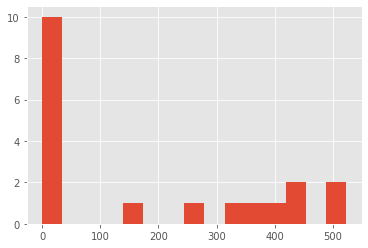

In [154]:
((order_date_max - order_date_min)/np.timedelta64(1,'D')).hist(bins = 15)

In [155]:
life_time = (order_date_max - order_date_min).reset_index()
life_time.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


<AxesSubplot:>

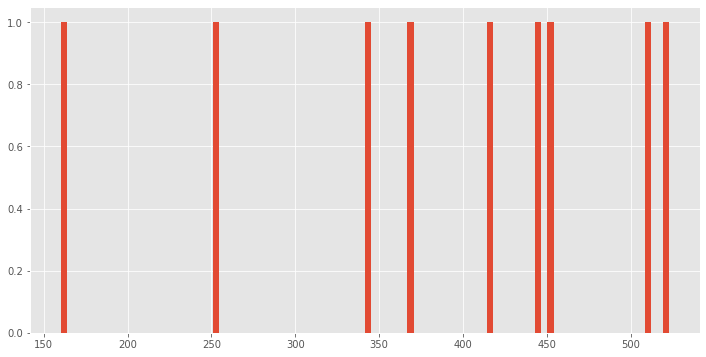

In [156]:
life_time['life_time'] = life_time.order_date / np.timedelta64(1,'D')
life_time[life_time.life_time >0 ].life_time.hist(bins = 100,figsize = (12,6))

In [157]:
life_time[life_time.life_time>0].life_time.mean()

385.55555555555554

In [158]:
user_purchase_retention = pd.merge(left = user_purchase,right = order_date_min.reset_index(),how = 'inner',on = 'user_id',suffixes=('','_min'))
user_purchase_retention.head(5)

,user_id,order_products,order_amount,order_date,order_date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


In [159]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date - user_purchase_retention.order_date_min
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days
1,2,1,12.00,1997-01-12,1997-01-12,0 days
2,2,5,77.00,1997-01-12,1997-01-12,0 days
3,3,2,20.76,1997-01-02,1997-01-02,0 days
4,3,2,20.76,1997-03-30,1997-01-02,87 days


In [160]:
date_trans = lambda x:x/np.timedelta64(1,'D')

user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(date_trans)
user_purchase_retention.head(10)

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0


In [161]:
bin = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff,bins = bin)

In [162]:
user_purchase_retention.head(20)

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60.0, 90.0]"
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0,"(60.0, 90.0]"
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0,"(180.0, 365.0]"
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0,"(180.0, 365.0]"
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0,NaN
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0,NaN


In [163]:
pivoted_retention = user_purchase_retention.pivot_table(index = 'user_id',columns = 'date_diff_bin',values= 'order_amount', aggfunc = sum)

pivoted_rentention.head(10)

date_diff_bin,"(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,
3,NaN,NaN,NaN,40.30,NaN,78.41
4,NaN,29.73,NaN,NaN,NaN,41.44
5,13.97,NaN,38.90,NaN,110.40,155.54
7,NaN,NaN,NaN,NaN,NaN,97.43
8,NaN,NaN,13.97,NaN,45.29,104.17
9,NaN,NaN,NaN,NaN,30.33,NaN
11,NaN,19.30,NaN,12.77,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,70.10
19,NaN,NaN,NaN,NaN,11.77,NaN


In [164]:
pivoted_retention.mean()

date_diff_bin
(7, 15]       13.970000
(15, 30]      24.515000
(30, 60]      26.435000
(60, 90]      26.535000
(90, 180]     49.447500
(180, 365]    91.181667
dtype: float64

In [165]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,
3,0,0,0,1,0,1
4,0,1,0,0,0,1
5,1,0,1,0,1,1
7,0,0,0,0,0,1
8,0,0,1,0,1,1


<AxesSubplot:xlabel='date_diff_bin'>

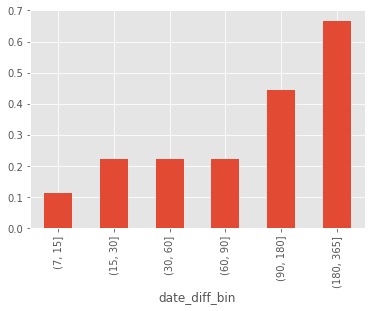

In [166]:
(pivoted_retention_trans.sum( )/ pivoted_retention_trans.count()).plot.bar()

In [167]:
grouped = user_purchase_retention.groupby('user_id')
i= 0
for user,group in grouped:
    print(group)
    i += 1
    if i == 2:
        break

   user_id  order_products  order_amount order_date order_date_min  \
0        1               1         11.77 1997-01-01     1997-01-01   

  order_date_diff  date_diff date_diff_bin  
0          0 days        0.0           NaN  
   user_id  order_products  order_amount order_date order_date_min  \
1        2               1          12.0 1997-01-12     1997-01-12   
2        2               5          77.0 1997-01-12     1997-01-12   

  order_date_diff  date_diff date_diff_bin  
1          0 days        0.0           NaN  
2          0 days        0.0           NaN  


In [168]:
def diff(group):
    d = group.date_diff -group.date_diff.shift(-1)
    return d

last_diff = user_purchase_retention.groupby('user_id').apply(diff)
last_diff.head(10)

user_id   
1        0      NaN
2        1      0.0
         2      NaN
3        3    -87.0
         4     -3.0
         5   -227.0
         6    -10.0
         7   -184.0
         8      NaN
4        9    -17.0
Name: date_diff, dtype: float64

In [169]:
x = pd.Series([1,2,3,4,5])

In [170]:
x.shift()

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [171]:
x.shift(-1)

0    2.0
1    3.0
2    4.0
3    5.0
4    NaN
dtype: float64

In [172]:
last_diff.mean()

-93.78378378378379

<AxesSubplot:>

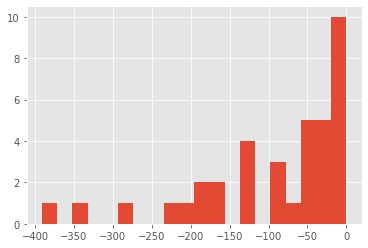

In [173]:
last_diff.hist(bins = 20)